####TASK1####

Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
custom_download_path = '/kaggle/working/nltk_data'
os.makedirs(custom_download_path, exist_ok=True)
nltk.data.path.append(custom_download_path)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train_data = pd.read_csv("train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("test_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data_solution  = pd.read_csv("test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [ ]:
print("shape",train_data.shape)
train_data.head()

shape (9560, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (11303, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df.shape

(20863, 4)

#DATA CLEANING AND PREPROCESSING#

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()
df.dropna( inplace = True )

In [ ]:
df.shape

(20863, 4)

In [ ]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'[#@\$]', '', text)

    tokens = word_tokenize(text)

    lemmatizer  = WordNetLemmatizer()

    text = text.split()

    text = [word for word in text if word not in stopword]

    return " ".join(text)

In [ ]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)

In [ ]:
df.head()

,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


#DATA VISUALIZATION#

In [ ]:
df["Genre"].value_counts()

 drama           5238
 documentary     5044
 comedy          2849
 short           1982
 horror           835
 thriller         632
 action           519
 western          388
 reality-tv       346
 family           309
 music            291
 adventure        273
 romance          264
 sci-fi           247
 adult            236
 animation        208
 sport            163
 crime            163
 talk-show        145
 fantasy          126
 mystery          120
 biography        101
 musical           97
 history           96
 game-show         76
 news              69
 war               46
Name: Genre, dtype: int64

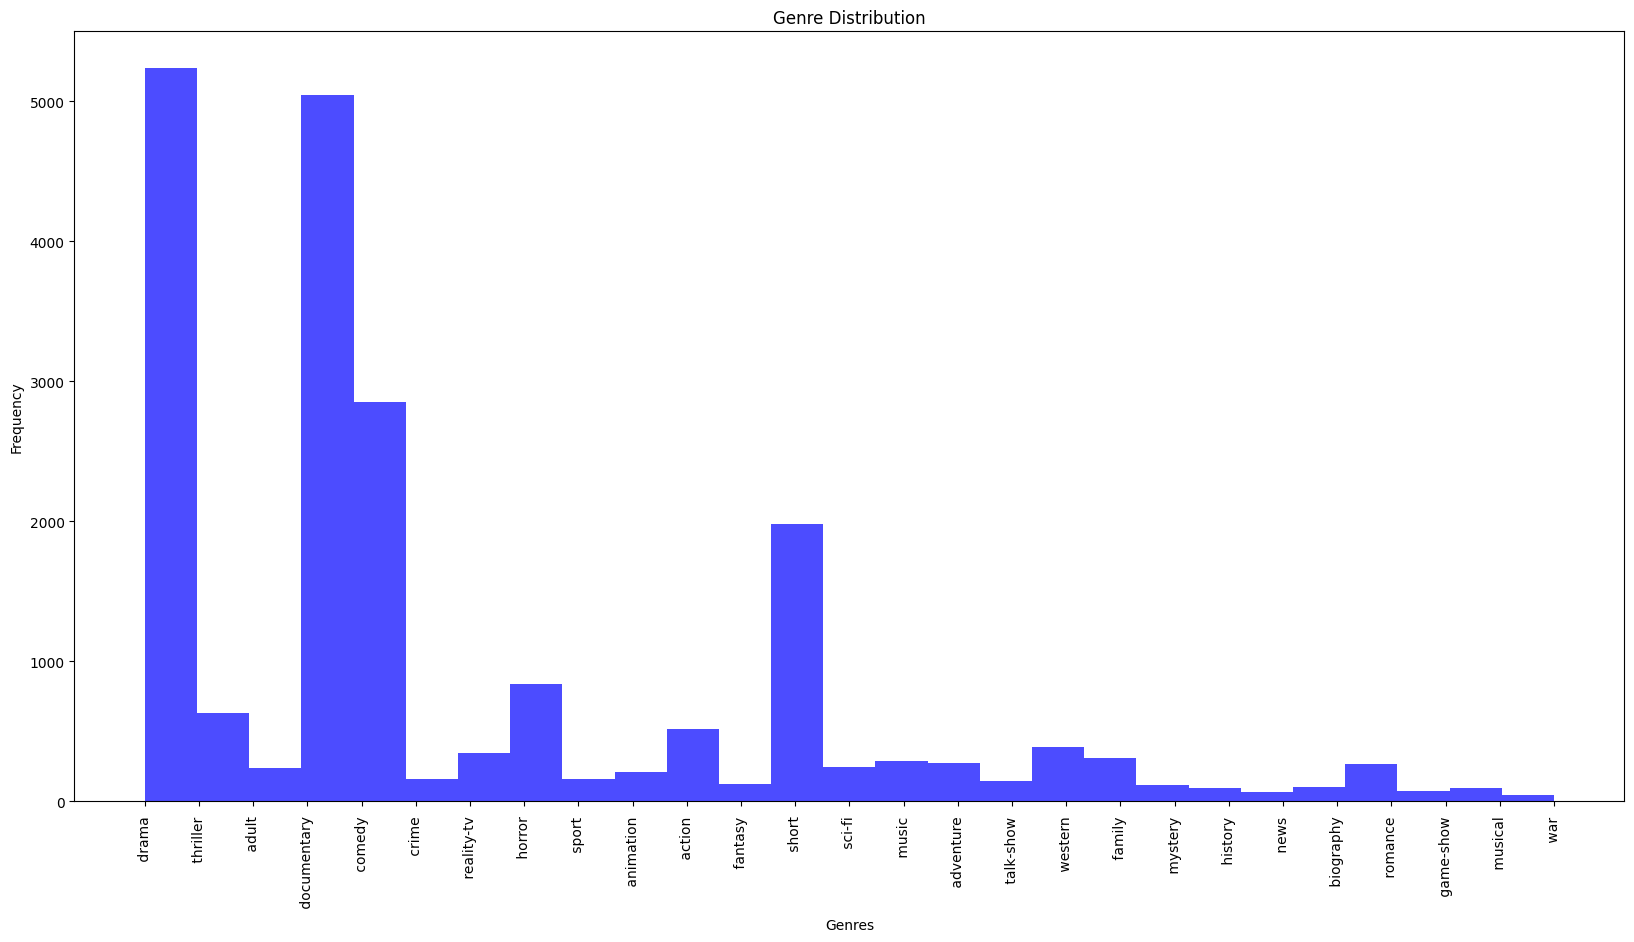

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

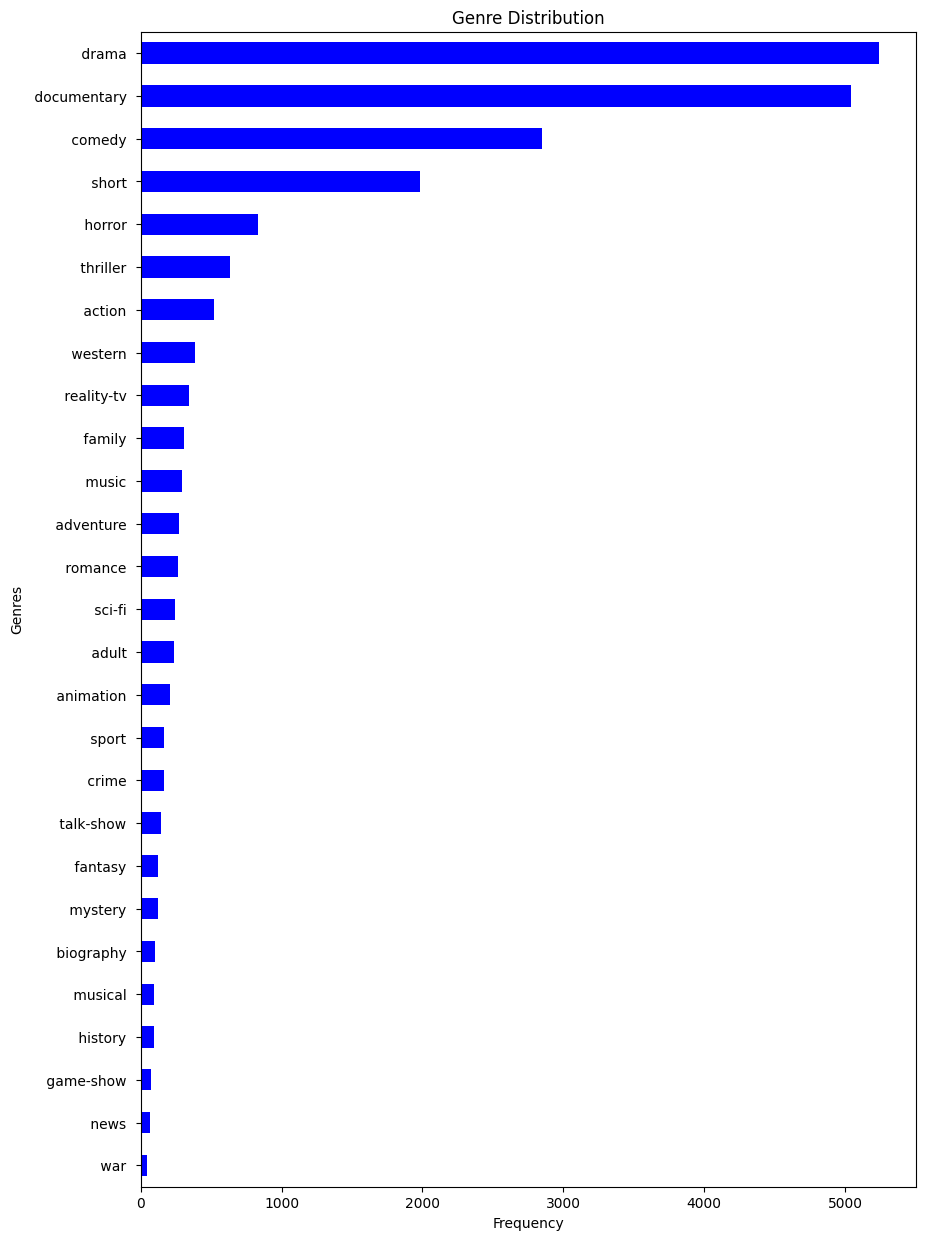

In [ ]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

#FEATURE ENGINEERING#

In [ ]:
data = df.drop(["Title","id"] , axis = 1)
data.head()

,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


#MODEL SELECTION, TRAINING#

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
data.head(6)

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8
5,documentary,Quality Control consists of a series of 16mm ...,quality control consists series 16mm single ta...,7


In [ ]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

#MODEL TRAINING USING COUNTERVECTORIZER #

In [ ]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.690154347617678
Model Score on Training data 0.4914685582822086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.50      0.02         4
       adult        0.00      0.00      0.00         0
   adventure        0.01      0.50      0.03         4
   animation        0.00      0.00      0.00         3
   biography        0.00      0.00      0.00         0
      comedy        0.32      0.51      0.40       890
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.55      0.68      4115
       drama        0.85      0.43      0.57      5227
      family        0.01      1.00      0.02         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.06      1.00      0.12         2
     history        0.00      0.00      0.00         0
      horror        0.10      0.68      0.17        56
       music        0.01      0.67      0.03         3
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

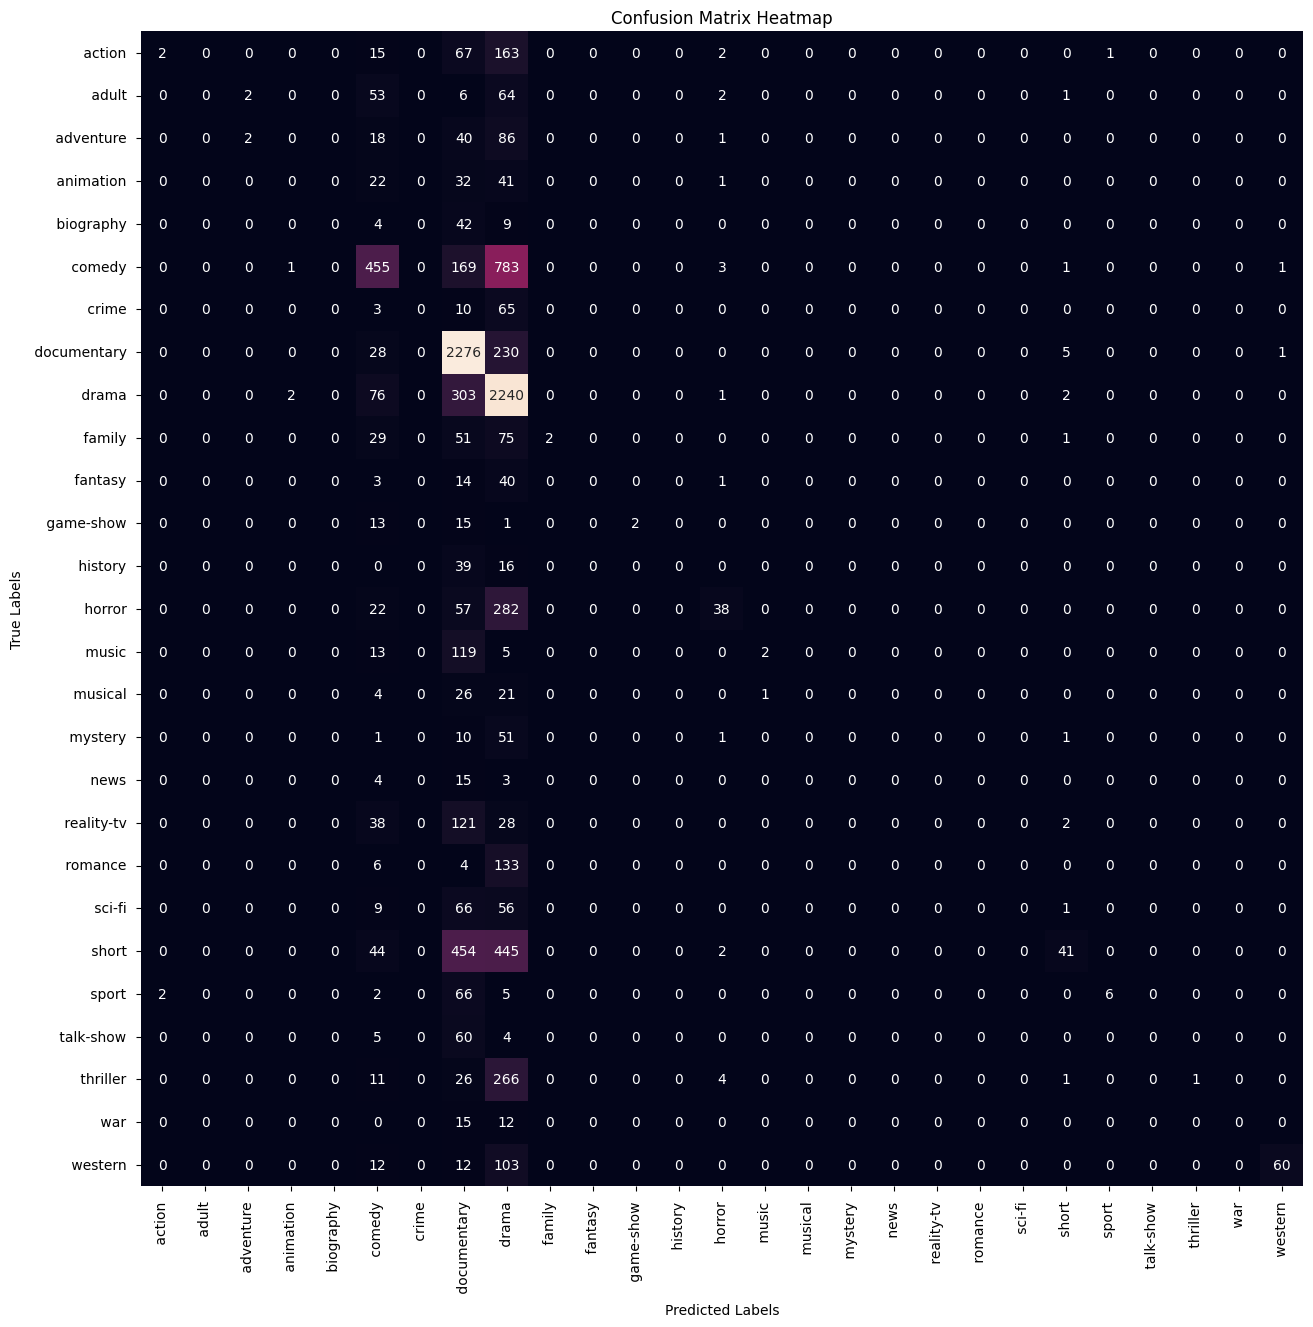

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9996165276579426
Model Score on Training data 0.524635736196319


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.21      0.37      0.27       142
       adult        0.14      0.60      0.23        30
   adventure        0.12      0.44      0.18        39
   animation        0.07      0.44      0.13        16
   biography        0.00      0.00      0.00         0
      comedy        0.51      0.44      0.47      1628
       crime        0.01      0.06      0.02        16
 documentary        0.78      0.65      0.71      3069
       drama        0.69      0.51      0.59      3516
      family        0.08      0.35      0.12        34
     fantasy        0.02      0.20      0.03         5
   game-show        0.52      0.84      0.64        19
     history        0.00      0.00      0.00         0
      horror        0.53      0.56      0.54       380
       music        0.37      0.60      0.46        85
     musical        0.02      1.00      0.04         1
     mystery        0.02      0.50      0.03         2
        n

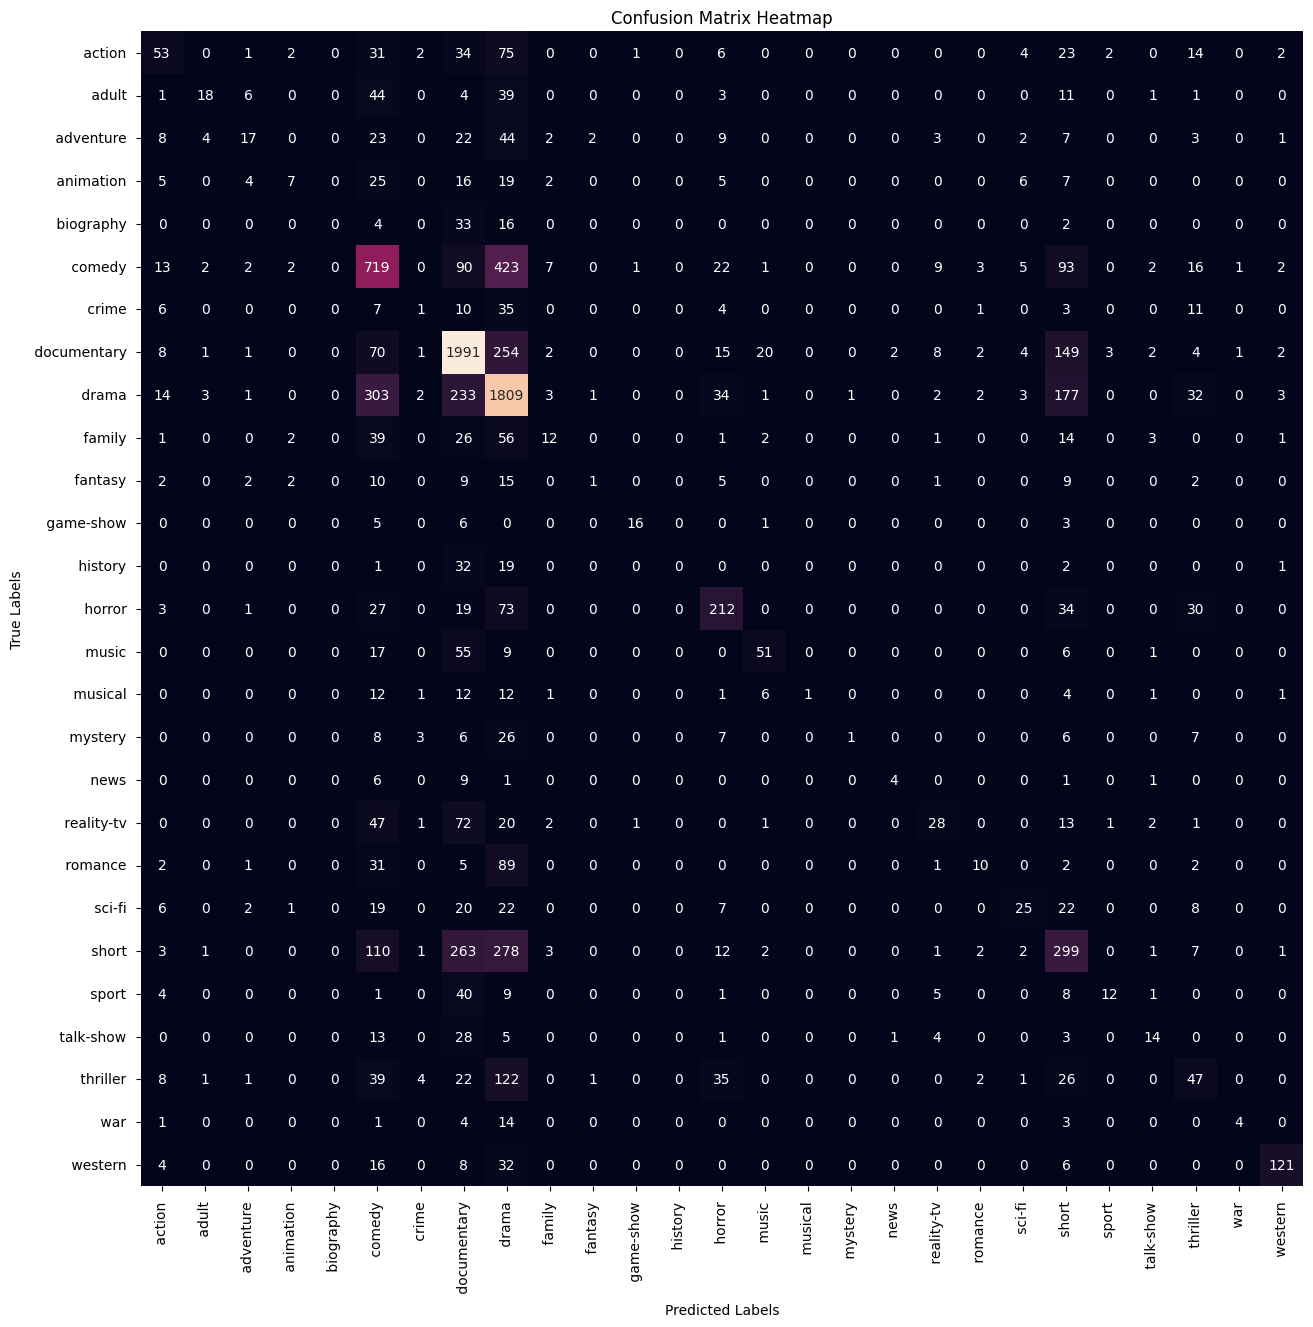

In [ ]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Random Forest - Train Score: 0.999712395743457
Random Forest - Test Score: 0.4741180981595092


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.67      0.02         3
       adult        0.00      0.00      0.00         0
   adventure        0.12      0.77      0.20        22
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.23      0.52      0.32       625
       crime        0.00      0.00      0.00         0
 documentary        0.87      0.55      0.67      4065
       drama        0.85      0.41      0.55      5515
      family        0.01      1.00      0.02         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.26      0.89      0.40         9
     history        0.00      0.00      0.00         0
      horror        0.07      0.68      0.12        38
       music        0.06      0.67      0.11        12
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

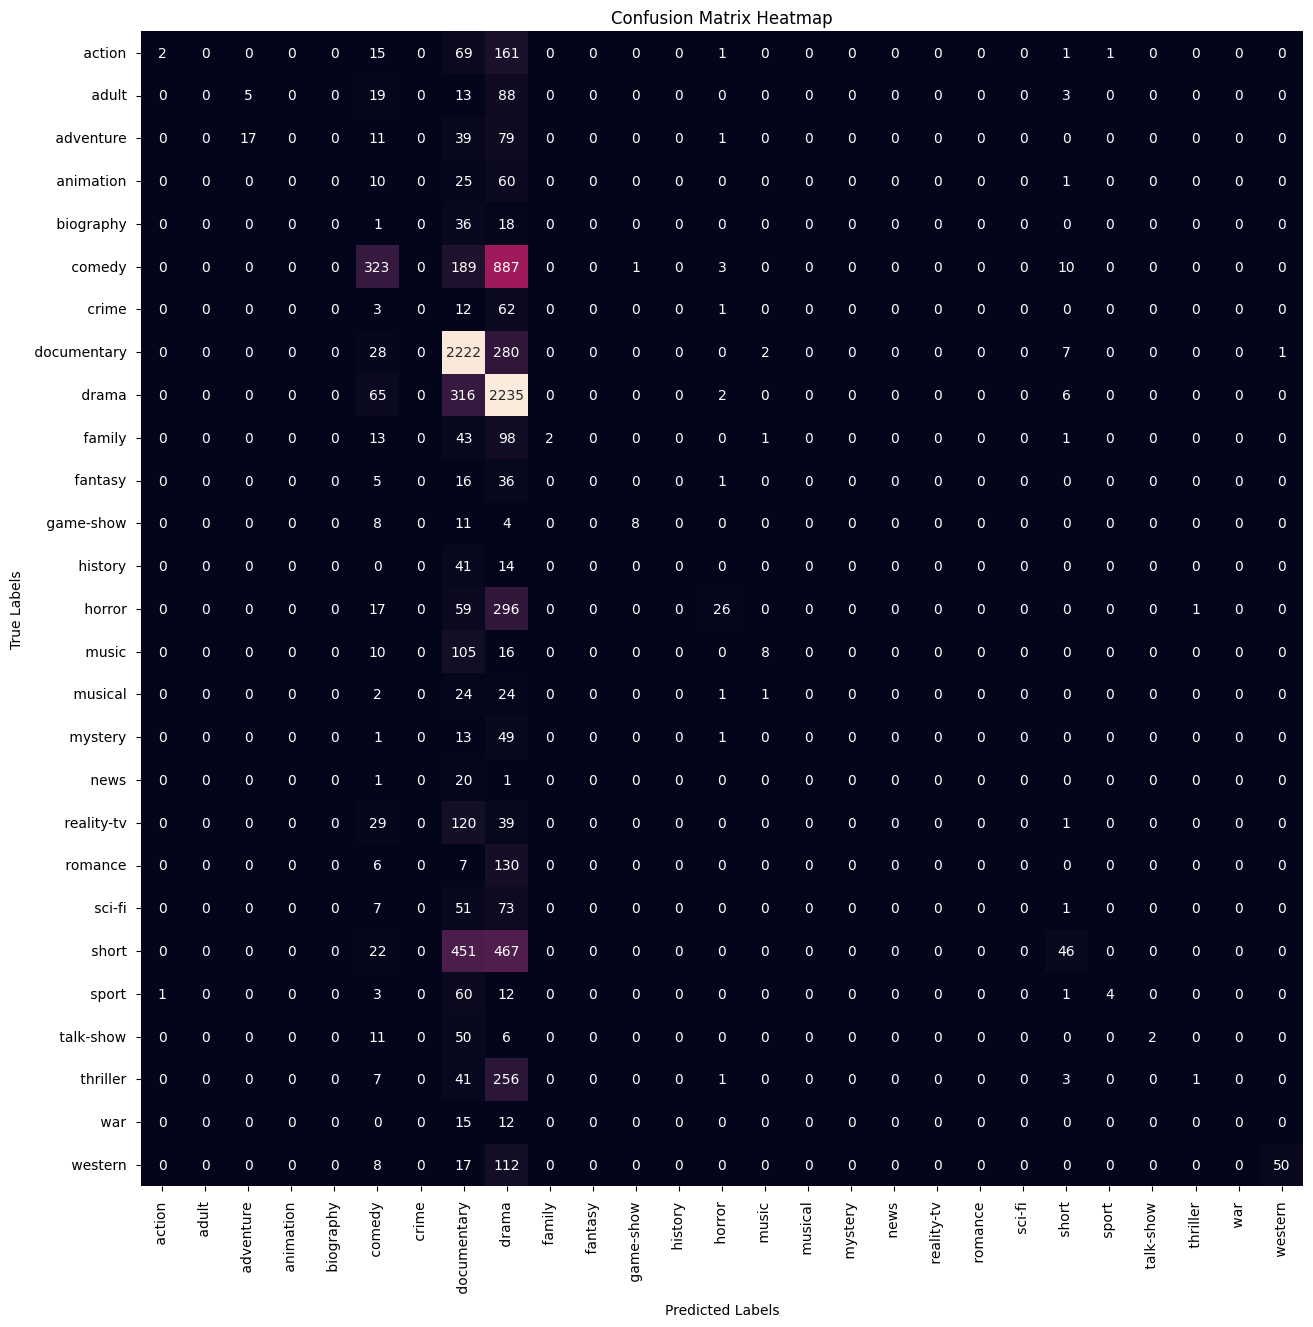

In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(x_train1, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train1, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test1, y_test))

y_pred = random_forest.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.999712395743457
Model Score on Training data 0.49223542944785276
               precision    recall  f1-score   support

      action        0.21      0.25      0.23       209
       adult        0.16      0.45      0.24        47
   adventure        0.18      0.40      0.25        68
   animation        0.16      0.31      0.21        48
   biography        0.00      0.00      0.00         6
      comedy        0.48      0.42      0.45      1603
       crime        0.05      0.11      0.07        37
 documentary        0.72      0.64      0.68      2857
       drama        0.61      0.51      0.55      3142
      family        0.10      0.25      0.14        63
     fantasy        0.02      0.06      0.03        17
   game-show        0.55      0.63      0.59        27
     history        0.00      0.00      0.00         3
      horror        0.54      0.47      0.50       456
       music        0.42      0.54      0.47       110
     musical        0.0

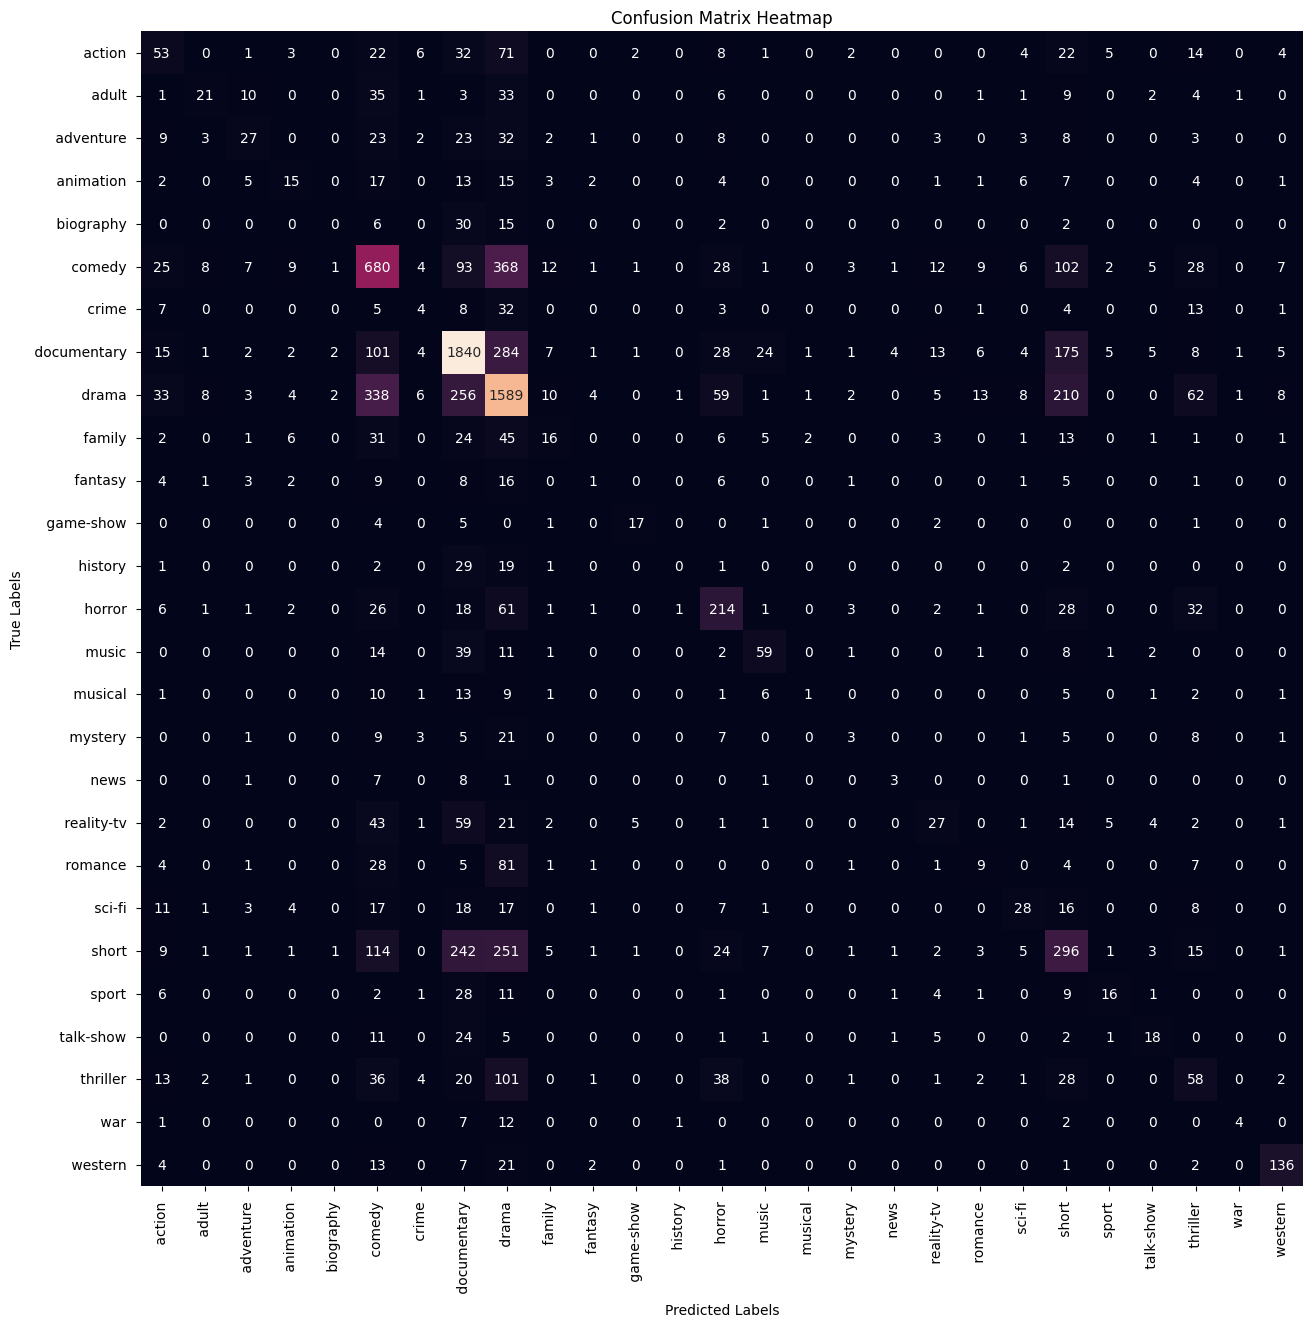

In [ ]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Training data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#TfidfVectorizer technique#

In [ ]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

Model Score on Training data 0.690154347617678
Model Score on Training data 0.4914685582822086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.01      0.50      0.02         4
       adult        0.00      0.00      0.00         0
   adventure        0.01      0.50      0.03         4
   animation        0.00      0.00      0.00         3
   biography        0.00      0.00      0.00         0
      comedy        0.32      0.51      0.40       890
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.55      0.68      4115
       drama        0.85      0.43      0.57      5227
      family        0.01      1.00      0.02         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.06      1.00      0.12         2
     history        0.00      0.00      0.00         0
      horror        0.10      0.68      0.17        56
       music        0.01      0.67      0.03         3
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

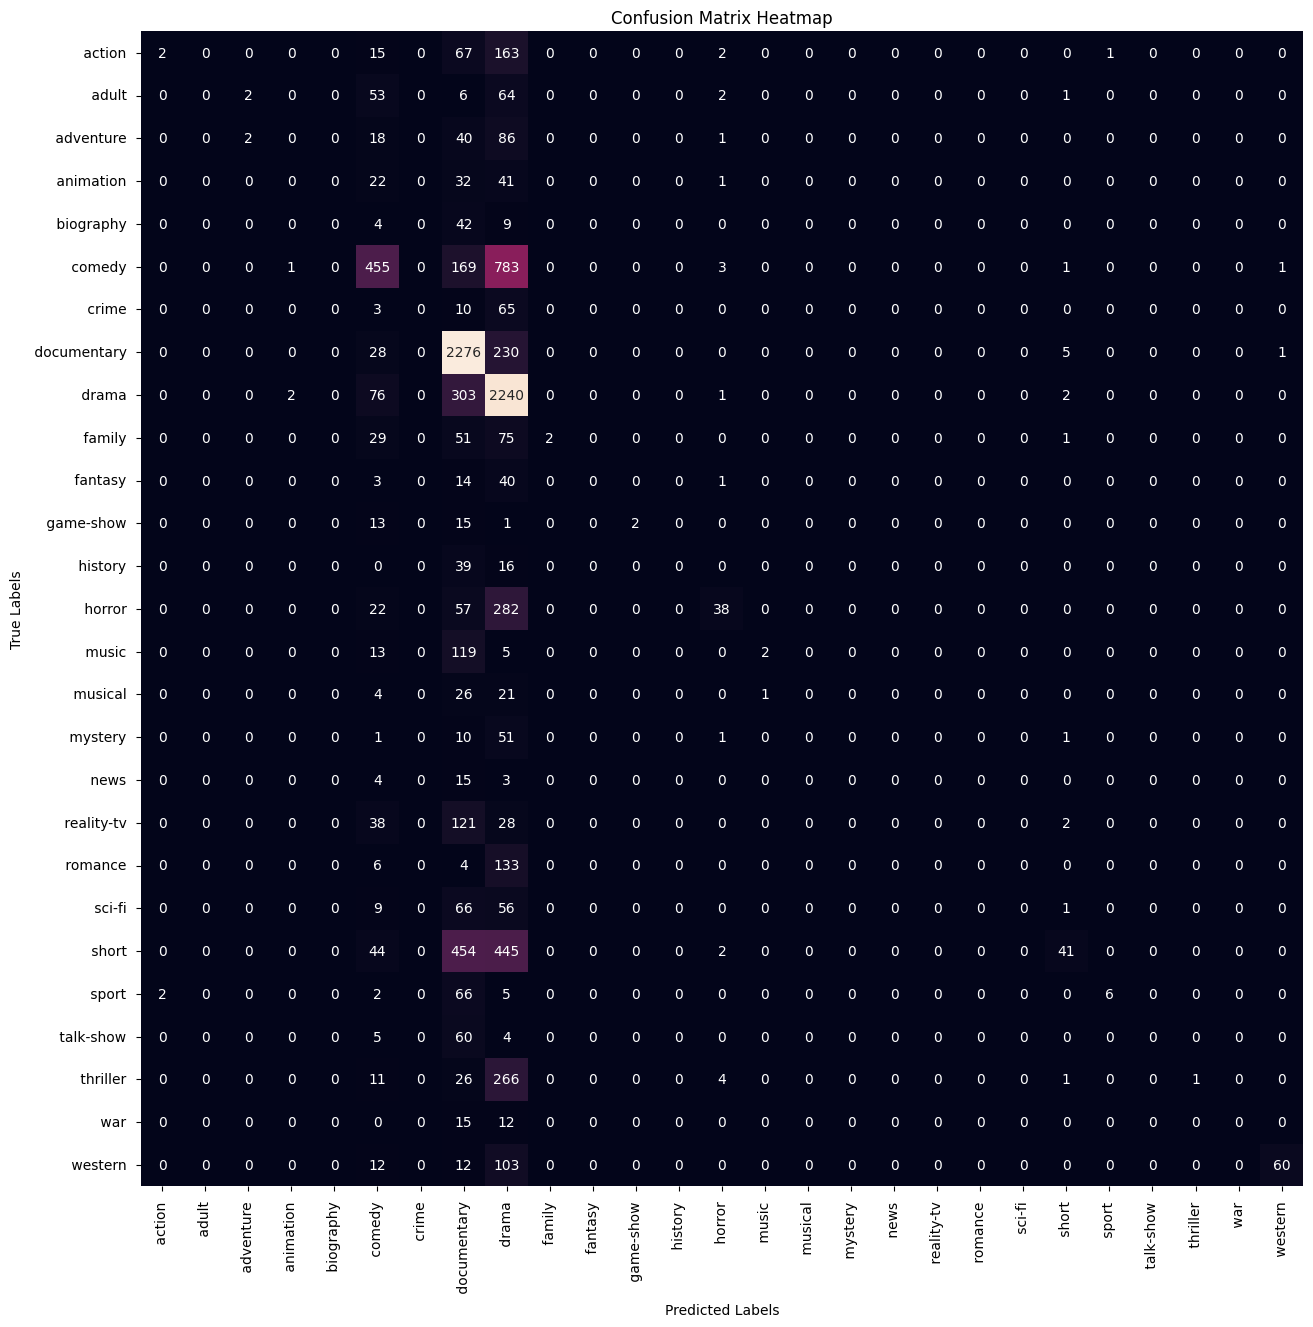

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Training data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9996165276579426
Model Score on Training data 0.524635736196319


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.21      0.37      0.27       142
       adult        0.14      0.60      0.23        30
   adventure        0.12      0.44      0.18        39
   animation        0.07      0.44      0.13        16
   biography        0.00      0.00      0.00         0
      comedy        0.51      0.44      0.47      1628
       crime        0.01      0.06      0.02        16
 documentary        0.78      0.65      0.71      3069
       drama        0.69      0.51      0.59      3516
      family        0.08      0.35      0.12        34
     fantasy        0.02      0.20      0.03         5
   game-show        0.52      0.84      0.64        19
     history        0.00      0.00      0.00         0
      horror        0.53      0.56      0.54       380
       music        0.37      0.60      0.46        85
     musical        0.02      1.00      0.04         1
     mystery        0.02      0.50      0.03         2
        n

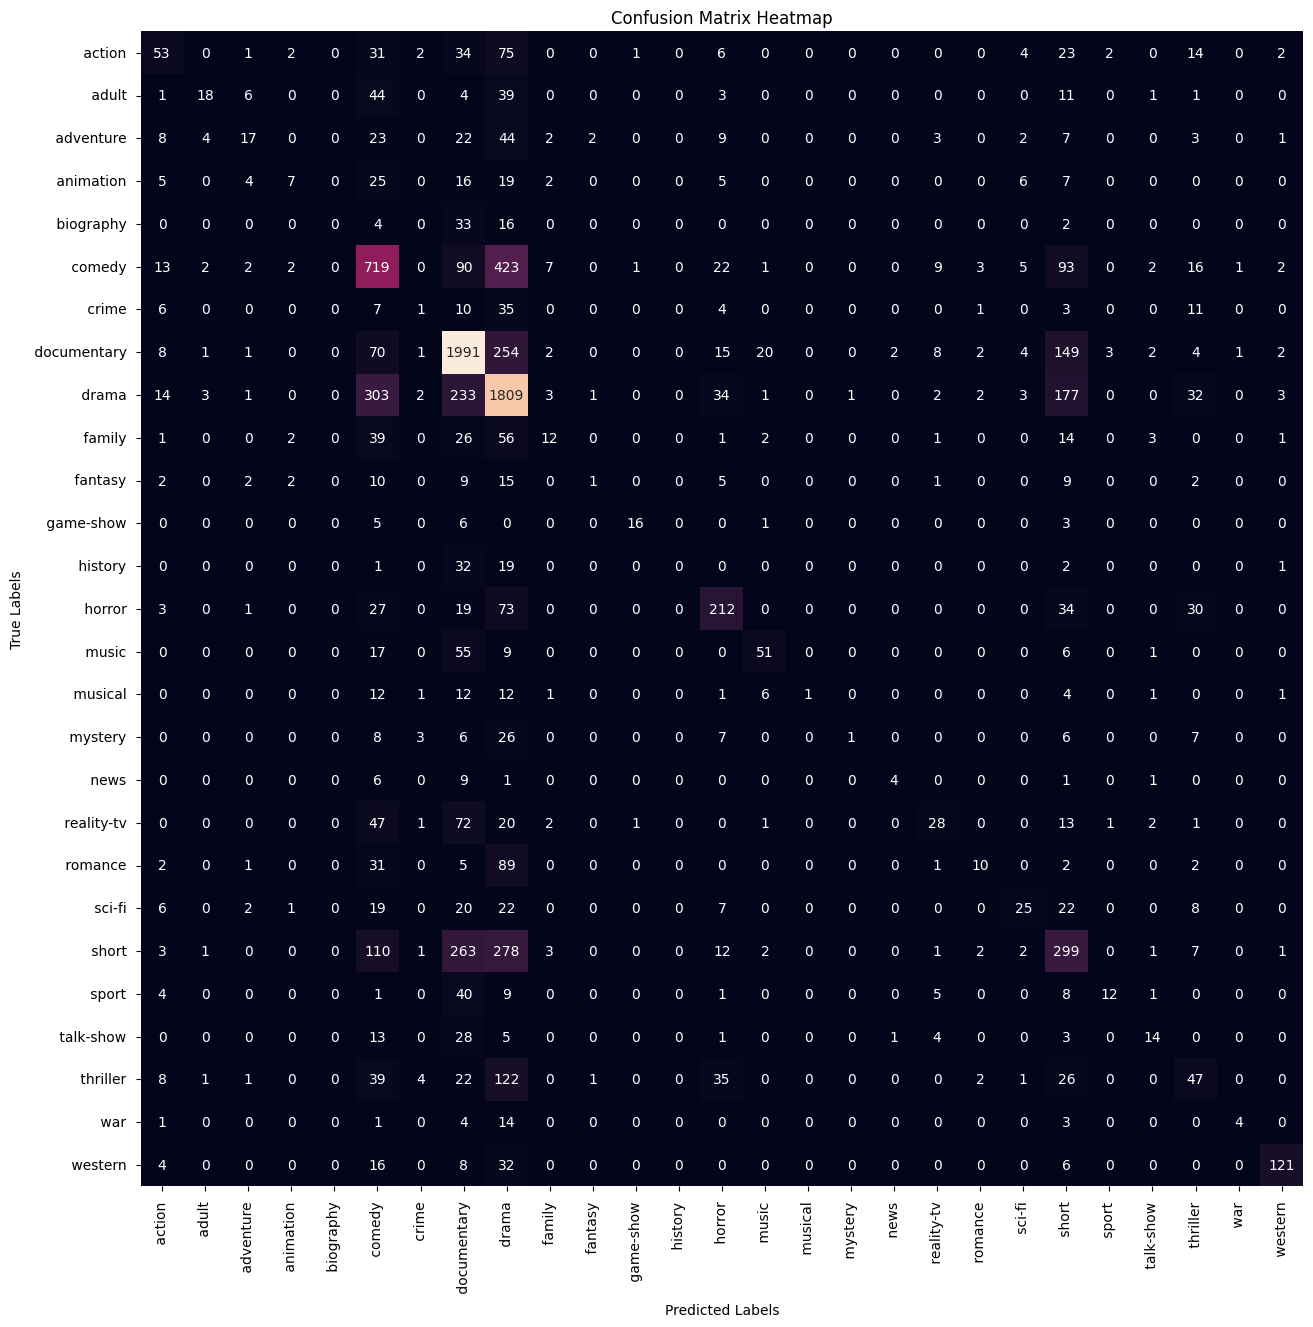

In [ ]:
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data ",model.score(x_train2 ,y_train))
print("Model Score on Training data ",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

Random Forest - Train Score: 0.999712395743457
Random Forest - Test Score: 0.47306365030674846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.00      0.50      0.01         2
       adult        0.00      0.00      0.00         0
   adventure        0.08      0.67      0.15        18
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.24      0.52      0.33       651
       crime        0.00      0.00      0.00         0
 documentary        0.87      0.55      0.67      4053
       drama        0.85      0.40      0.55      5498
      family        0.01      1.00      0.02         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.29      0.90      0.44        10
     history        0.00      0.00      0.00         0
      horror        0.08      0.78      0.14        40
       music        0.04      0.83      0.07         6
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

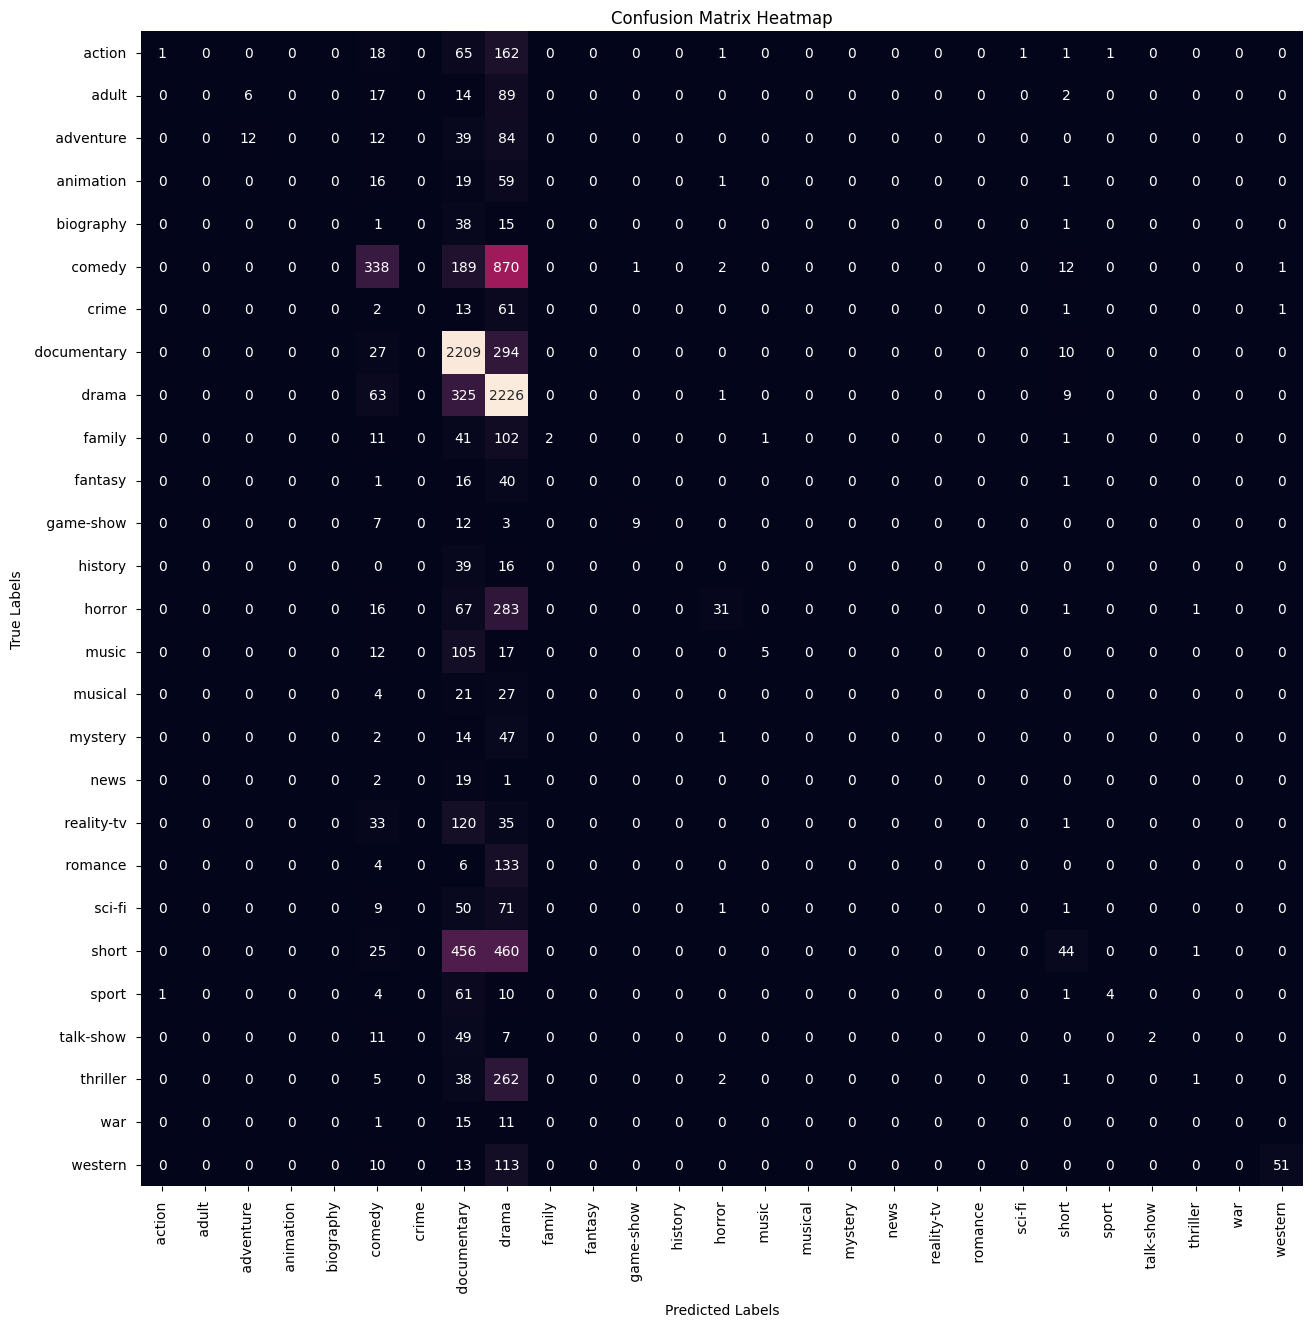

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train2, y_train)


print("Random Forest - Train Score:",random_forest.score(x_train2, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test2, y_test))

y_pred = random_forest.predict(x_test2)
print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.999712395743457
Model Score on Training data 0.49223542944785276
               precision    recall  f1-score   support

      action        0.21      0.25      0.23       209
       adult        0.16      0.45      0.24        47
   adventure        0.18      0.40      0.25        68
   animation        0.16      0.31      0.21        48
   biography        0.00      0.00      0.00         6
      comedy        0.48      0.42      0.45      1603
       crime        0.05      0.11      0.07        37
 documentary        0.72      0.64      0.68      2857
       drama        0.61      0.51      0.55      3142
      family        0.10      0.25      0.14        63
     fantasy        0.02      0.06      0.03        17
   game-show        0.55      0.63      0.59        27
     history        0.00      0.00      0.00         3
      horror        0.54      0.47      0.50       456
       music        0.42      0.54      0.47       110
     musical        0.0

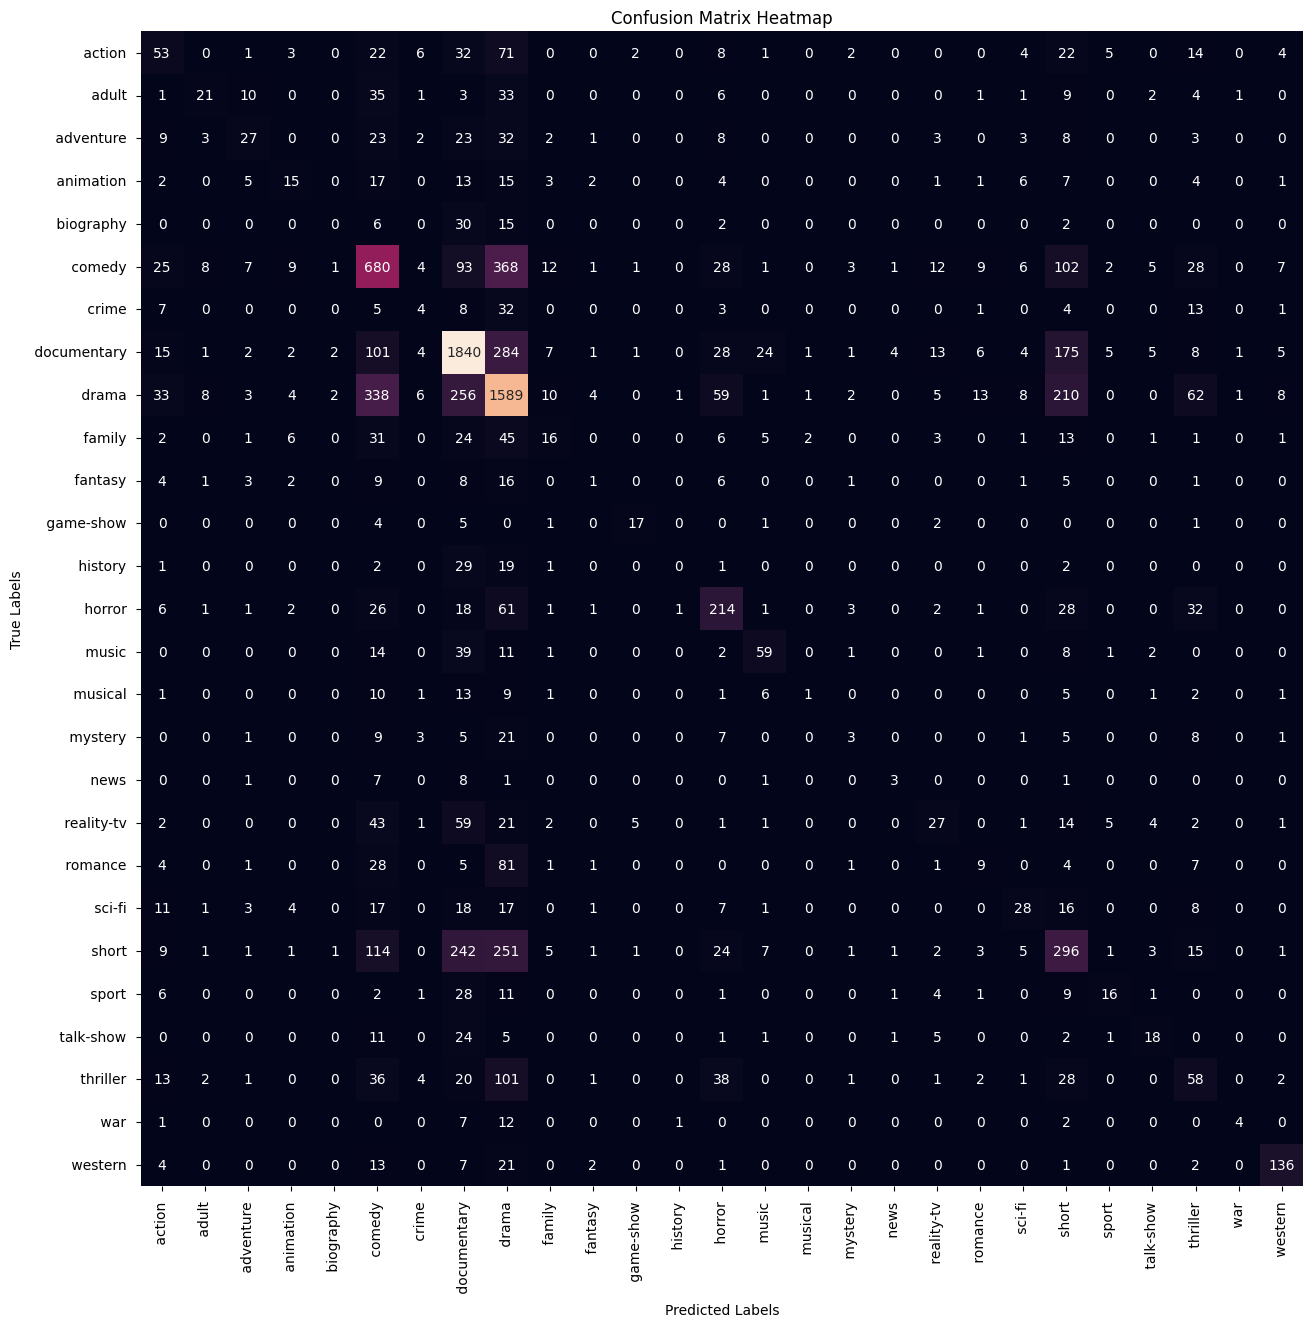

In [ ]:
svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Training data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()